In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv("train.csv")

In [154]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [155]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [156]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [157]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

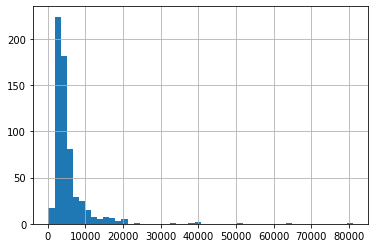

In [158]:
df['ApplicantIncome'].hist(bins=50)

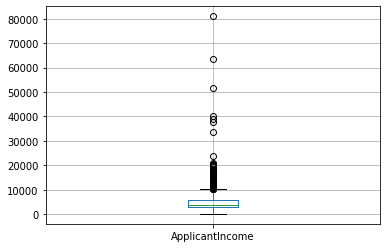

In [159]:
df.boxplot(column='ApplicantIncome')

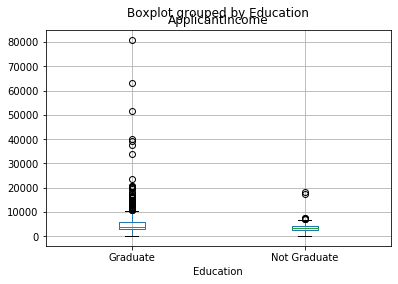

In [160]:
df.boxplot(column='ApplicantIncome',by='Education')

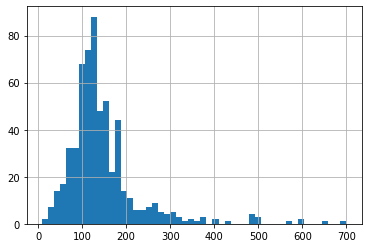

In [161]:
df['LoanAmount'].hist(bins=50)

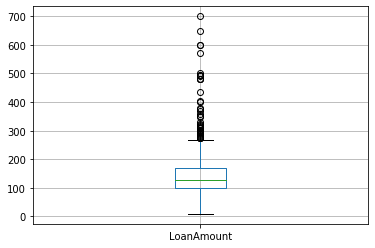

In [162]:
df.boxplot(column='LoanAmount')

In [163]:
temp1=df['Credit_History'].value_counts(ascending=True)

temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

In [164]:
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [165]:
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

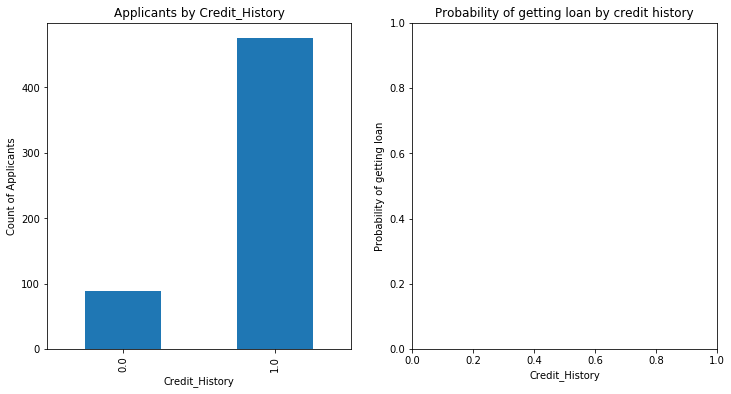

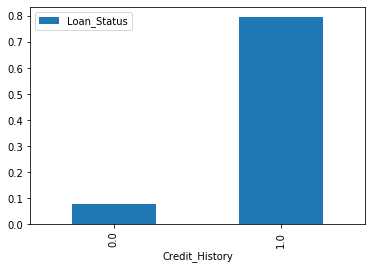

In [166]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

# Label Encoding

In [167]:
df['Married']=df.Married.map({'Yes':1,'No':0})

In [168]:
df['Gender']=df.Gender.map({'Male':1,'Female':0})

In [169]:
df["Self_Employed"]=df.Self_Employed.map({'Yes':1,'No':0})

In [170]:
df["Loan_Status"]=df.Loan_Status.map({'Y':1,'N':0})

In [171]:
data_dummies=pd.get_dummies(df['Property_Area'],drop_first=True,prefix='Property_Area')
df=df.drop('Property_Area',axis=1).join(data_dummies)

In [172]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [173]:
df["Education"]=df.Education.map({"Graduate":1,"Not Graduate":0})

In [174]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
Gender,1.000000,0.369612,-0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337,0.019857,-0.111910,0.037089
Married,0.369612,1.000000,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,0.089280,0.003744,0.000514
Education,-0.049258,-0.014223,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,0.085884,0.039410,0.034279
Self_Employed,-0.009829,0.001909,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,-0.002303,0.005900,-0.029171
ApplicantIncome,0.053989,0.051332,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710,-0.014246,-0.000598
CoapplicantIncome,0.083946,0.077770,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187,-0.027044,0.022776
LoanAmount,0.106947,0.149519,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318,-0.008401,-0.034003
Loan_Amount_Term,-0.075117,-0.103810,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268,0.061957,-0.098112
Credit_History,0.016337,0.004381,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678,0.042414,-0.023721
Loan_Status,0.019857,0.089280,0.085884,-0.002303,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000,0.136540,-0.043621


# Data Cleansing

In [175]:
df.isnull().values.sum()

149

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID                    614 non-null object
Gender                     601 non-null float64
Married                    611 non-null float64
Dependents                 599 non-null object
Education                  614 non-null int64
Self_Employed              582 non-null float64
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 592 non-null float64
Loan_Amount_Term           600 non-null float64
Credit_History             564 non-null float64
Loan_Status                614 non-null int64
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: float64(7), int64(3), object(2), uint8(2)
memory usage: 58.8+ KB


In [177]:
df.LoanAmount.fillna(df['LoanAmount'].mean(),inplace=True)

In [178]:
df.Loan_Amount_Term.fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [179]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [180]:
df.Credit_History.fillna(1,inplace=True)

In [181]:
df.Self_Employed.fillna(0,inplace=True)

In [182]:
df.Self_Employed.value_counts()

0.0    532
1.0     82
Name: Self_Employed, dtype: int64

In [183]:
df.drop(["Dependents"],axis=1,inplace=True)

In [184]:
df.dropna(axis=0,inplace=True)

In [185]:
df.drop('Loan_ID',axis=1,inplace=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
Gender                     598 non-null float64
Married                    598 non-null float64
Education                  598 non-null int64
Self_Employed              598 non-null float64
ApplicantIncome            598 non-null int64
CoapplicantIncome          598 non-null float64
LoanAmount                 598 non-null float64
Loan_Amount_Term           598 non-null float64
Credit_History             598 non-null float64
Loan_Status                598 non-null int64
Property_Area_Semiurban    598 non-null uint8
Property_Area_Urban        598 non-null uint8
dtypes: float64(7), int64(3), uint8(2)
memory usage: 52.6 KB


In [187]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1.0,1.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,1


In [188]:
col = "Loan_Status" 
df = pd.concat([df[col],df.drop(col,axis=1)], axis=1)

df.head()

,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,1.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1.0,1.0,1,1.0,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1.0,1.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,1.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,0,1


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
Loan_Status                598 non-null int64
Gender                     598 non-null float64
Married                    598 non-null float64
Education                  598 non-null int64
Self_Employed              598 non-null float64
ApplicantIncome            598 non-null int64
CoapplicantIncome          598 non-null float64
LoanAmount                 598 non-null float64
Loan_Amount_Term           598 non-null float64
Credit_History             598 non-null float64
Property_Area_Semiurban    598 non-null uint8
Property_Area_Urban        598 non-null uint8
dtypes: float64(7), int64(3), uint8(2)
memory usage: 52.6 KB


In [190]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

# Train Test Split

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# Logistic regression model

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
lm=LogisticRegression()

In [195]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
y_pred=lm.predict(X_test)

In [197]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [198]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.8583333333333333


In [199]:
print(confusion_matrix(y_test,y_pred))

[[18 15]
 [ 2 85]]


## Submission

In [200]:
test=pd.read_csv('test.csv')

In [201]:
test['Married']=test.Married.map({'Yes':1,'No':0})
test['Gender']=test.Gender.map({'Male':1,'Female':0})
test["Self_Employed"]=test.Self_Employed.map({'Yes':1,'No':0})
data_dummies=pd.get_dummies(test['Property_Area'],drop_first=True,prefix='Property_Area')
test=test.drop('Property_Area',axis=1).join(data_dummies)
test["Education"]=test.Education.map({"Graduate":1,"Not Graduate":0})
test.LoanAmount.fillna(test['LoanAmount'].mean(),inplace=True)
test.Loan_Amount_Term.fillna(test['Loan_Amount_Term'].mean(),inplace=True)
test.Credit_History.fillna(1,inplace=True)
test.Self_Employed.fillna(0,inplace=True)
test.drop(["Dependents"],axis=1,inplace=True)
test.dropna(axis=0,inplace=True)

In [202]:
ID=test['Loan_ID']
ID.shape

(356,)

In [203]:
test.drop('Loan_ID',axis=1,inplace=True)

In [204]:
y_pred_test=lm.predict(test)

In [205]:
y_pred_test.shape

(356,)

In [206]:
pd.DataFrame({'Loan_ID':ID,'Loan_Status':y_pred_test}).set_index('Loan_ID').to_csv('submission01.csv')

In [213]:
submission=pd.read_csv('submission01.csv')

In [209]:
submission['Loan_Status']=submission.Loan_Status.map({1:'Y',0:'N'})

In [210]:
submission.to_csv('submission02.csv')